C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/2357904489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = pd.to_datetime(filtered_data['Year'].astype(str) + '-' + filtered_data['Month'].astype(str))


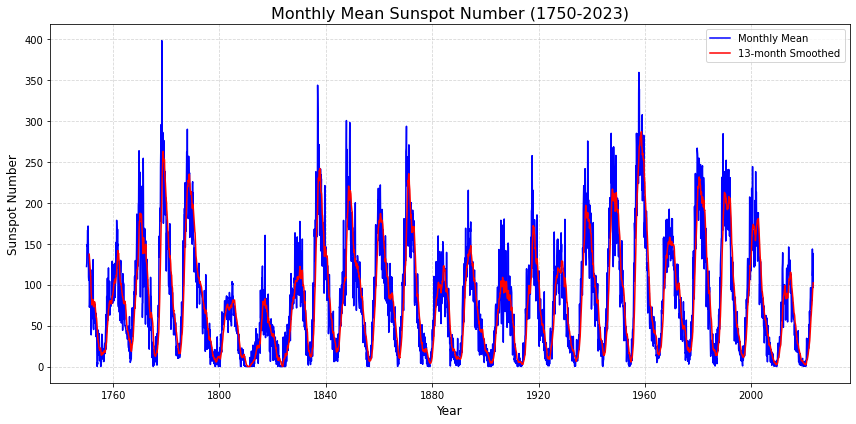

In [59]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Filter the data for the desired period
filtered_data = data[(data['Year'] >= 1750)]

# Create a new column for the time series data
filtered_data['Time'] = pd.to_datetime(filtered_data['Year'].astype(str) + '-' + filtered_data['Month'].astype(str))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the monthly mean sunspot number (blue)
ax.plot(filtered_data['Time'], filtered_data['Monthly Mean Total Sunspot Number'], color='blue', label='Monthly Mean')

# Compute the 13-month moving average
smoothed_data = filtered_data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

# Plot the 13-month smoothed sunspot number data (red)
ax.plot(filtered_data['Time'], smoothed_data, color='red', label='13-month Smoothed')

# Set the plot title and labels
ax.set_title('Monthly Mean Sunspot Number (1750-2023)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sunspot Number', fontsize=12)

# Add a legend
ax.legend()

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/348461575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = pd.to_datetime(filtered_data['Year'].astype(str) + '-' + filtered_data['Month'].astype(str))


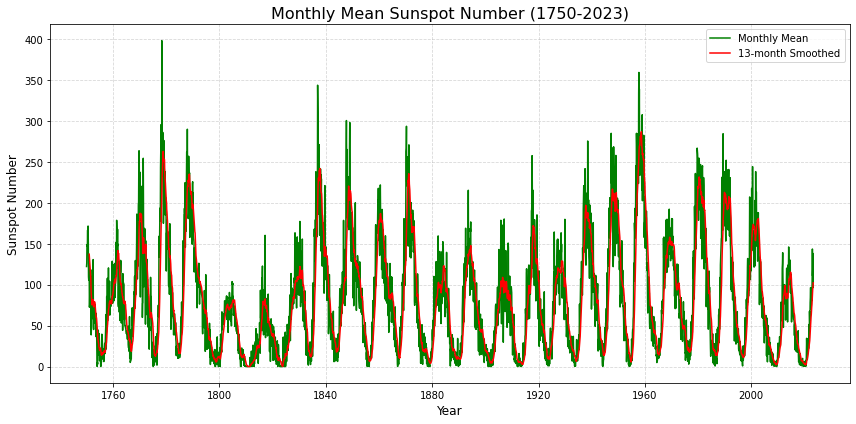

In [84]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Filter the data for the desired period
filtered_data = data[(data['Year'] >= 1750)]

# Create a new column for the time series data
filtered_data['Time'] = pd.to_datetime(filtered_data['Year'].astype(str) + '-' + filtered_data['Month'].astype(str))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the monthly mean sunspot number (green)
ax.plot(filtered_data['Time'], filtered_data['Monthly Mean Total Sunspot Number'], color='green', label='Monthly Mean')

# Compute the 13-month moving average
smoothed_data = filtered_data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

# Plot the 13-month smoothed sunspot number data (green)
ax.plot(filtered_data['Time'], smoothed_data, color='red', label='13-month Smoothed')

# Set the plot title and labels
ax.set_title('Monthly Mean Sunspot Number (1750-2023)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sunspot Number', fontsize=12)

# Add a legend
ax.legend()

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()


2/2 [==============================] - 0s 5ms/step
Bidirectional LSTM Model with 19 hidden units:
Train RMSE: 25.39
Test RMSE: 9.41



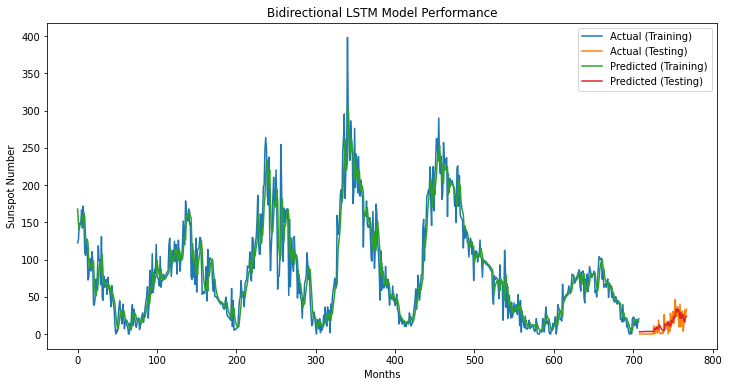

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    model = create_bidirectional_lstm_model(units)
    train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(model, train_data, test_data)
    results.append((units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions))

# Print the results and plot the predictions
for units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print()

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
    plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()


# Use 13-month smoothed sunspot number data

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Smoothed data
smoothed_data = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean().values.reshape(-1, 1)

# Replace missing values with the mean of the non-missing values
smoothed_data = np.where(np.isnan(smoothed_data), np.nanmean(smoothed_data), smoothed_data)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(smoothed_data)

# Split data into train and test sets
train_data = target_scaled[:720]
test_data = target_scaled[720:792]

# Create the LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, activation='relu'), input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the model
def train_evaluate_model(model, train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Inverse transform predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Define the hidden units for the LSTM layer
hidden_units = [19]

results = []

# Train and evaluate models for different hidden units
for units in hidden_units:
    model = create_bidirectional_lstm_model(units)
    train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(model, train_data, test_data)
    results.append((units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions))

# Print the results
for units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions in results:
    print(f'Hidden Units: {units}')
    print(f'Train RMSE: {train_rmse:.2f}')
    print(f'Test RMSE: {test_rmse:.2f}')
    print('')


3/3 [==============================] - 0s 2ms/step
Hidden Units: 19
Train RMSE: 4.90
Test RMSE: 2.58



Hidden Units: 19
Train RMSE: 4.90
Test RMSE: 2.58



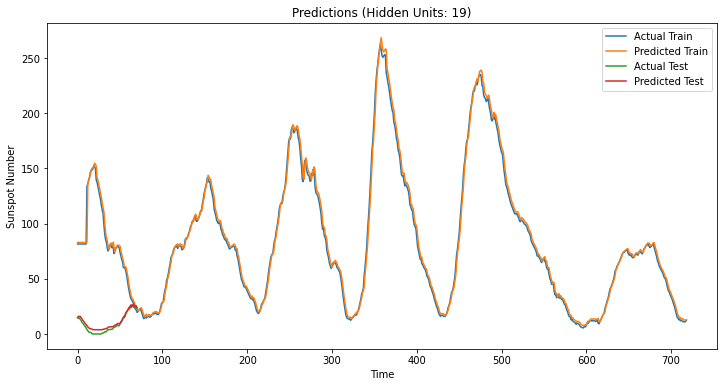

In [75]:
import matplotlib.pyplot as plt

# ...

# Print the results and visualize the predictions
for units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions in results:
    print(f'Hidden Units: {units}')
    print(f'Train RMSE: {train_rmse:.2f}')
    print(f'Test RMSE: {test_rmse:.2f}')
    print('')

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(y_train, label='Actual Train')
    plt.plot(train_predictions, label='Predicted Train')
    plt.plot(y_test, label='Actual Test')
    plt.plot(test_predictions, label='Predicted Test')
    plt.title(f'Predictions (Hidden Units: {units})')
    plt.xlabel('Time')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()


Hidden Units: 19
Train RMSE: 4.90
Test RMSE: 2.58



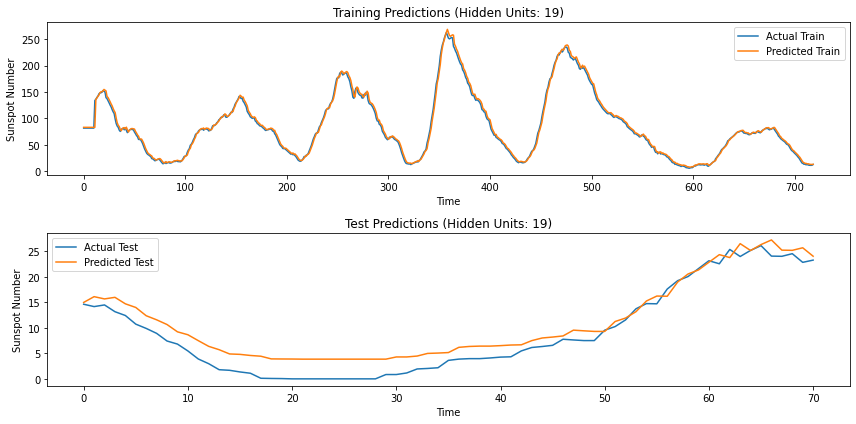

In [76]:
# ...

# Print the results and visualize the predictions
for units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions in results:
    print(f'Hidden Units: {units}')
    print(f'Train RMSE: {train_rmse:.2f}')
    print(f'Test RMSE: {test_rmse:.2f}')
    print('')

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(y_train, label='Actual Train')
    plt.plot(train_predictions, label='Predicted Train')
    plt.title(f'Training Predictions (Hidden Units: {units})')
    plt.xlabel('Time')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(y_test, label='Actual Test')
    plt.plot(test_predictions, label='Predicted Test')
    plt.title(f'Test Predictions (Hidden Units: {units})')
    plt.xlabel('Time')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


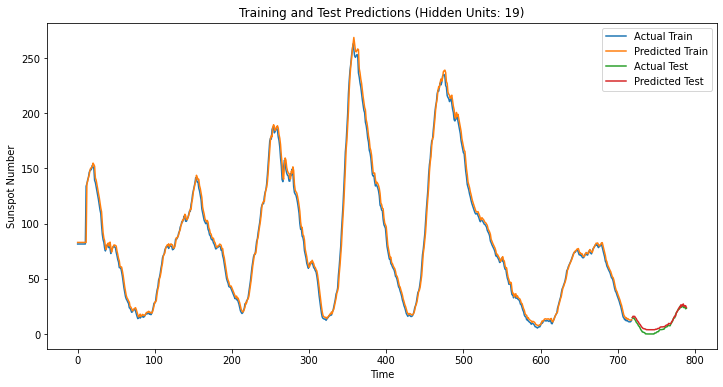

In [77]:
# ...

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual Train')
plt.plot(train_predictions, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted Test')
plt.title(f'Training and Test Predictions (Hidden Units: {units})')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


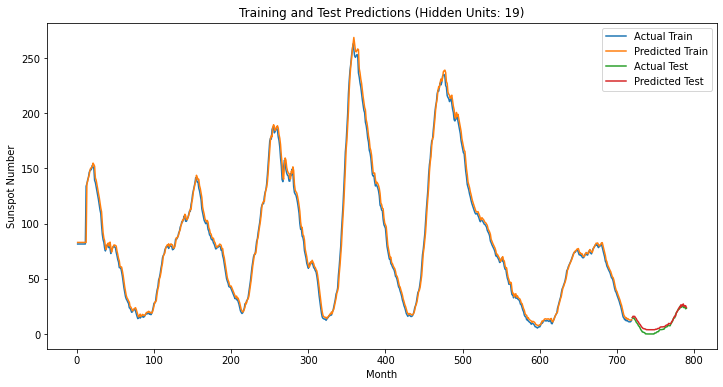

In [79]:
# ...

# Create the x-axis values for the training and test data
x_train = np.arange(1, len(y_train) + 1)
x_test = np.arange(len(y_train) + 1, len(y_train) + len(y_test) + 1)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(x_train, y_train, label='Actual Train')
plt.plot(x_train, train_predictions, label='Predicted Train')
plt.plot(x_test, y_test, label='Actual Test')
plt.plot(x_test, test_predictions, label='Predicted Test')
plt.title(f'Training and Test Predictions (Hidden Units: {units})')
plt.xlabel('Month')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Smoothed data
smoothed_data = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean().values.reshape(-1, 1)

# Replace missing values with the mean of the non-missing values
smoothed_data = np.where(np.isnan(smoothed_data), np.nanmean(smoothed_data), smoothed_data)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(smoothed_data)

# Split data into train and test sets
train_data = target_scaled[:720]
test_data = target_scaled[720:792]

def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(time_intervals, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, return_sequences=True), input_shape=(time_intervals, 1)))
    model.add(Bidirectional(LSTM(units)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def prepare_lstm_data(data, time_intervals):
    X, y = [], []
    for i in range(len(data) - time_intervals):
        X.append(data[i:i+time_intervals])
        y.append(data[i+time_intervals])
    X = np.array(X)
    y = np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

def train_evaluate_model(model, train_data, test_data):
    X_train, y_train = prepare_lstm_data(train_data, time_intervals)
    X_test, y_test = prepare_lstm_data(test_data, time_intervals)

    model.fit(X_train, y_train, epochs=100, batch_size=32)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

def train_evaluate_adaboost_model(model, train_data, test_data):
    X_train, y_train = prepare_lstm_data(train_data, time_intervals)
    X_test, y_test = prepare_lstm_data(test_data, time_intervals)

    model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

    train_predictions = model.predict(X_train.reshape((X_train.shape[0], -1)))
    test_predictions = model.predict(X_test.reshape((X_test.shape[0], -1)))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

def train_evaluate_random_forest_model(model, train_data, test_data):
    X_train, y_train = prepare_lstm_data(train_data, time_intervals)
    X_test, y_test = prepare_lstm_data(test_data, time_intervals)

    model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

    train_predictions = model.predict(X_train.reshape((X_train.shape[0], -1)))
    test_predictions = model.predict(X_test.reshape((X_test.shape[0], -1)))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

def train_evaluate_linear_regression_model(model, train_data, test_data):
    X_train, y_train = prepare_lstm_data(train_data, time_intervals)
    X_test, y_test = prepare_lstm_data(test_data, time_intervals)

    model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

    train_predictions = model.predict(X_train.reshape((X_train.shape[0], -1)))
    test_predictions = model.predict(X_test.reshape((X_test.shape[0], -1)))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

def train_evaluate_svr_model(model, train_data, test_data):
    X_train, y_train = prepare_lstm_data(train_data, time_intervals)
    X_test, y_test = prepare_lstm_data(test_data, time_intervals)

    model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

    train_predictions = model.predict(X_train.reshape((X_train.shape[0], -1)))
    test_predictions = model.predict(X_test.reshape((X_test.shape[0], -1)))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Define the number of time intervals for LSTM models
time_intervals = 12

# Create LSTM model
lstm_model = create_lstm_model(32)

# Create Bidirectional LSTM model
bidirectional_lstm_model = create_bidirectional_lstm_model(32)

# Create AdaBoost model
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Create Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create Linear Regression model
linear_regression_model = LinearRegression()

# Create SVR model
svr_model = SVR()

# Train and evaluate LSTM model
lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_model(
    lstm_model, train_data, test_data)

# Train and evaluate Bidirectional LSTM model
bidirectional_lstm_train_rmse, bidirectional_lstm_test_rmse, bidirectional_lstm_y_train, bidirectional_lstm_train_predictions, bidirectional_lstm_y_test, bidirectional_lstm_test_predictions = train_evaluate_model(
    bidirectional_lstm_model, train_data, test_data)

# Train and evaluate AdaBoost model
adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(
    adaboost_model, train_data, test_data)

# Train and evaluate Random Forest model
random_forest_train_rmse, random_forest_test_rmse, random_forest_y_train, random_forest_train_predictions, random_forest_y_test, random_forest_test_predictions = train_evaluate_random_forest_model(
    random_forest_model, train_data, test_data)

# Train and evaluate Linear Regression model
linear_regression_train_rmse, linear_regression_test_rmse, linear_regression_y_train, linear_regression_train_predictions, linear_regression_y_test, linear_regression_test_predictions = train_evaluate_linear_regression_model(
    linear_regression_model, train_data, test_data)

# Train and evaluate SVR model
svr_train_rmse, svr_test_rmse, svr_y_train, svr_train_predictions, svr_y_test, svr_test_predictions = train_evaluate_svr_model(
    svr_model, train_data, test_data)

# Rescale the predictions
lstm_train_predictions_rescaled = scaler.inverse_transform(lstm_train_predictions)
lstm_test_predictions_rescaled = scaler.inverse_transform(lstm_test_predictions)

bidirectional_lstm_train_predictions_rescaled = scaler.inverse_transform(bidirectional_lstm_train_predictions)
bidirectional_lstm_test_predictions_rescaled = scaler.inverse_transform(bidirectional_lstm_test_predictions)

adaboost_train_predictions_rescaled = scaler.inverse_transform(adaboost_train_predictions)
adaboost_test_predictions_rescaled = scaler.inverse_transform(adaboost_test_predictions)

random_forest_train_predictions_rescaled = scaler.inverse_transform(random_forest_train_predictions)
random_forest_test_predictions_rescaled = scaler.inverse_transform(random_forest_test_predictions)

linear_regression_train_predictions_rescaled = scaler.inverse_transform(linear_regression_train_predictions)
linear_regression_test_predictions_rescaled = scaler.inverse_transform(linear_regression_test_predictions)

svr_train_predictions_rescaled = scaler.inverse_transform(svr_train_predictions)
svr_test_predictions_rescaled = scaler.inverse_transform(svr_test_predictions)

# Calculate RMSE for rescaled predictions
lstm_train_rmse_rescaled = np.sqrt(mean_squared_error(lstm_y_train, lstm_train_predictions_rescaled))
lstm_test_rmse_rescaled = np.sqrt(mean_squared_error(lstm_y_test, lstm_test_predictions_rescaled))

bidirectional_lstm_train_rmse_rescaled = np.sqrt(mean_squared_error(bidirectional_lstm_y_train, bidirectional_lstm_train_predictions_rescaled))
bidirectional_lstm_test_rmse_rescaled = np.sqrt(mean_squared_error(bidirectional_lstm_y_test, bidirectional_lstm_test_predictions_rescaled))

adaboost_train_rmse_rescaled = np.sqrt(mean_squared_error(adaboost_y_train, adaboost_train_predictions_rescaled))
adaboost_test_rmse_rescaled = np.sqrt(mean_squared_error(adaboost_y_test, adaboost_test_predictions_rescaled))

random_forest_train_rmse_rescaled = np.sqrt(mean_squared_error(random_forest_y_train, random_forest_train_predictions_rescaled))
random_forest_test_rmse_rescaled = np.sqrt(mean_squared_error(random_forest_y_test, random_forest_test_predictions_rescaled))

linear_regression_train_rmse_rescaled = np.sqrt(mean_squared_error(linear_regression_y_train, linear_regression_train_predictions_rescaled))
linear_regression_test_rmse_rescaled = np.sqrt(mean_squared_error(linear_regression_y_test, linear_regression_test_predictions_rescaled))

svr_train_rmse_rescaled = np.sqrt(mean_squared_error(svr_y_train, svr_train_predictions_rescaled))
svr_test_rmse_rescaled = np.sqrt(mean_squared_error(svr_y_test, svr_test_predictions_rescaled))

# Print the RMSE values
print("LSTM Model:")
print("Train RMSE: {:.4f}".format(lstm_train_rmse_rescaled))
print("Test RMSE: {:.4f}".format(lstm_test_rmse_rescaled))
print()
print("Bidirectional LSTM Model:")
print("Train RMSE: {:.4f}".format(bidirectional_lstm_train_rmse_rescaled))
print("Test RMSE: {:.4f}".format(bidirectional_lstm_test_rmse_rescaled))
print()
print("AdaBoost Model:")
print("Train RMSE: {:.4f}".format(adaboost_train_rmse_rescaled))
print("Test RMSE: {:.4f}".format(adaboost_test_rmse_rescaled))
print()
print("Random Forest Model:")
print("Train RMSE: {:.4f}".format(random_forest_train_rmse_rescaled))
print("Test RMSE: {:.4f}".format(random_forest_test_rmse_rescaled))
print()
print("Linear Regression Model:")
print("Train RMSE: {:.4f}".format(linear_regression_train_rmse_rescaled))
print("Test RMSE: {:.4f}".format(linear_regression_test_rmse_rescaled))
print()
print("SVR Model:")
print("Train RMSE: {:.4f}".format(svr_train_rmse_rescaled))
print("Test RMSE: {:.4f}".format(svr_test_rmse_rescaled))

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(lstm_y_test)), lstm_y_test, label='Actual')
plt.plot(range(len(lstm_test_predictions_rescaled)), lstm_test_predictions_rescaled, label='LSTM')
plt.plot(range(len(bidirectional_lstm_test_predictions_rescaled)), bidirectional_lstm_test_predictions_rescaled, label='Bidirectional LSTM')
plt.plot(range(len(adaboost_test_predictions_rescaled)), adaboost_test_predictions_rescaled, label='AdaBoost')
plt.plot(range(len(random_forest_test_predictions_rescaled)), random_forest_test_predictions_rescaled, label='Random Forest')
plt.plot(range(len(linear_regression_test_predictions_rescaled)), linear_regression_test_predictions_rescaled, label='Linear Regression')
plt.plot(range(len(svr_test_predictions_rescaled)), svr_test_predictions_rescaled, label='SVR')
plt.title('Actual vs Predicted Sunspot Numbers')
plt.xlabel('Time')
plt.ylabel('Sunspot Numbers')
plt.legend()
plt.show()


Epoch 1/100
23/23 [==============================] - 2s 6ms/step - loss: 0.0256
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 11/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 12/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 13/100
23/23 [=================

23/23 [==============================] - 0s 5ms/step - loss: 2.5496e-04
Epoch 99/100
23/23 [==============================] - 0s 5ms/step - loss: 2.4301e-04
Epoch 100/100
2/2 [==============================] - 0s 6ms/step
Epoch 1/100
23/23 [==============================] - 7s 15ms/step - loss: 0.0205
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0068
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0049
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0039
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 7/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 8/100
23/23 [==============================] - 0s 12ms/step - loss: 8.2685e-04
Epoch 9/100
23/23 [==============================] - 0s 12ms/step - loss: 7.3823e-04
Epoch 10/100
23/23 [=====================

23/23 [==============================] - 0s 13ms/step - loss: 3.0744e-04
Epoch 93/100
23/23 [==============================] - 0s 13ms/step - loss: 2.8969e-04
Epoch 94/100
23/23 [==============================] - 0s 13ms/step - loss: 2.5487e-04
Epoch 95/100
23/23 [==============================] - 0s 19ms/step - loss: 2.5150e-04
Epoch 96/100
23/23 [==============================] - 0s 19ms/step - loss: 2.4330e-04
Epoch 97/100
23/23 [==============================] - 0s 18ms/step - loss: 3.1525e-04
Epoch 98/100
23/23 [==============================] - 0s 19ms/step - loss: 2.5294e-04
Epoch 99/100
23/23 [==============================] - 0s 19ms/step - loss: 2.6840e-04
Epoch 100/100
2/2 [==============================] - 0s 6ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/4080797174.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Expected 2D array, got 1D array instead:
array=[0.37638031 0.47127574 0.47700275 0.49935106 0.49935106 0.50569255
 0.50569255 0.50569255 0.50569255 0.53298077 0.50569255 0.50569255
 0.49935106 0.47700275 0.47127574 0.41228488 0.39136664 0.39136664
 0.3630753  0.3630753  0.3630753  0.3630753  0.32851044 0.32851044
 0.32851044 0.27922908 0.25616949 0.2701302  0.2701302  0.2701302
 0.2701302  0.32799094 0.27922908 0.25616949 0.26854193 0.2701302
 0.2701302  0.2701302  0.2701302  0.2701302  0.25616949 0.25137948
 0.22360966 0.22360966 0.20100011 0.20100011 0.20100011 0.18965305
 0.18965305 0.14962615 0.14962615 0.12576648 0.0989638  0.09304466
 0.07690479 0.07690479 0.07690479 0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.07690479
 0.07690479 0.07690479 0.12562298 0.14962615 0.14962615 0.17569478
 0.18965305 0.18965305 0.20100011 0.22360966 0.24454039 0.25616949
 0.25616949 0.26854193 0.2701302  0.2701302  0.2701302  0.2701302
 0.2701302  0.2701302  0.2701302  0.2701302  0.2701302  0.26854193
 0.2701302  0.2701302  0.2701302  0.3620714  0.37024263 0.37638031
 0.37638031 0.37638031 0.37638031 0.37638031 0.37024263 0.37024263
 0.37024263 0.37024263 0.37024263 0.3630753  0.3630753  0.3630753
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.39136664
 0.39136664 0.41228488 0.46029355 0.47127574 0.47700275 0.49935106
 0.49935106 0.47700275 0.49935106 0.47127574 0.41228488 0.39136664
 0.39136664 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.32851044
 0.32851044 0.32851044 0.32851044 0.32851044 0.32851044 0.3188093
 0.27922908 0.2701302  0.2701302  0.2701302  0.2701302  0.2701302
 0.2701302  0.2701302  0.26854193 0.26854193 0.25137948 0.23035159
 0.22360966 0.20100011 0.18965305 0.17569478 0.14962615 0.14962615
 0.14962615 0.14962615 0.14962615 0.14962615 0.14962615 0.12562298
 0.12562298 0.0989638  0.09304466 0.0989638  0.09304466 0.09304466
 0.07690479 0.07690479 0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.07690479 0.07690479 0.07690479
 0.09304466 0.0989638  0.14962615 0.14962615 0.16948639 0.18965305
 0.22360966 0.22360966 0.24454039 0.25616949 0.25616949 0.2701302
 0.3620714  0.37024263 0.37638031 0.37638031 0.37638031 0.3829253
 0.3829253  0.39136664 0.40648153 0.40648153 0.41228488 0.42315069
 0.47127574 0.47700275 0.50280019 0.53298077 0.5921877  0.62764774
 0.62764774 0.62764774 0.65025908 0.65025908 0.65025908 0.62837257
 0.62764774 0.65025908 0.65025908 0.62837257 0.62764774 0.62764774
 0.5921877  0.53298077 0.50569255 0.49935106 0.49935106 0.50569255
 0.53298077 0.53298077 0.50569255 0.50569255 0.50280019 0.50280019
 0.49935106 0.49935106 0.50569255 0.50280019 0.50569255 0.50569255
 0.47127574 0.41228488 0.41228488 0.39136664 0.39136664 0.39136664
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.32851044
 0.32851044 0.32851044 0.25616949 0.25616949 0.23035159 0.22360966
 0.22360966 0.20100011 0.22360966 0.22360966 0.22360966 0.22360966
 0.22360966 0.22360966 0.20100011 0.20100011 0.20100011 0.18965305
 0.18965305 0.14962615 0.14962615 0.0989638  0.07690479 0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.06927829 0.07690479
 0.09304466 0.12562298 0.14962615 0.14962615 0.18965305 0.22360966
 0.24454039 0.2701302  0.3630753  0.37024263 0.39242874 0.47127574
 0.50569255 0.5921877  0.62764774 0.65025908 0.73154379 0.75424394
 0.81775353 0.85915963 0.86103355 0.86103355 0.86103355 0.86103355
 0.86103355 0.86103355 0.86103355 0.86103355 0.86103355 0.86103355
 0.82170787 0.81775353 0.78471418 0.75424394 0.75424394 0.73287339
 0.73154379 0.73154379 0.73154379 0.65601722 0.65586274 0.62837257
 0.62764774 0.62764774 0.5921877  0.5581079  0.53298077 0.50569255
 0.50280019 0.50280019 0.50280019 0.47700275 0.47127574 0.47127574
 0.47127574 0.47127574 0.41228488 0.39136664 0.3630753  0.3630753
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.3630753
 0.32851044 0.27922908 0.25616949 0.25616949 0.23035159 0.23035159
 0.22360966 0.22360966 0.22360966 0.20100011 0.20100011 0.18965305
 0.18965305 0.18965305 0.17569478 0.14962615 0.14962615 0.14962615
 0.14962615 0.12562298 0.0989638  0.07690479 0.07690479 0.06927829
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.07690479 0.07690479 0.0989638  0.12576648
 0.14962615 0.14962615 0.14962615 0.18965305 0.22360966 0.25616949
 0.2701302  0.3620714  0.37024263 0.37638031 0.3829253  0.41228488
 0.47127574 0.50569255 0.53298077 0.53298077 0.5921877  0.62764774
 0.62764774 0.65025908 0.65586274 0.73154379 0.73154379 0.73287339
 0.75424394 0.75424394 0.75424394 0.78471418 0.78471418 0.78471418
 0.79017075 0.81775353 0.82170787 0.82170787 0.81775353 0.78471418
 0.75424394 0.73548532 0.73548532 0.73507804 0.73287339 0.73507804
 0.73507804 0.73287339 0.73154379 0.73154379 0.71075616 0.71075616
 0.71183025 0.71075616 0.71075616 0.65601722 0.65586274 0.65025908
 0.62837257 0.62764774 0.5921877  0.5921877  0.5711478  0.53298077
 0.53298077 0.50569255 0.49935106 0.47127574 0.47127574 0.46029355
 0.41228488 0.39136664 0.39136664 0.39136664 0.3630753  0.3630753
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.3630753
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.3630753
 0.3630753  0.3630753  0.3630753  0.3630753  0.3630753  0.3630753
 0.3630753  0.3630753  0.32851044 0.32851044 0.32851044 0.27922908
 0.2701302  0.2701302  0.26854193 0.25616949 0.25137948 0.25616949
 0.24454039 0.23035159 0.22360966 0.22360966 0.22360966 0.23035159
 0.23035159 0.22360966 0.22360966 0.22360966 0.20100011 0.20100011
 0.18965305 0.17569478 0.16948639 0.14962615 0.14962615 0.14962615
 0.14962615 0.12562298 0.12562298 0.0989638  0.12562298 0.12562298
 0.09304466 0.0989638  0.09304466 0.09304466 0.09304466 0.07690479
 0.07690479 0.07690479 0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.07690479 0.07690479 0.09304466 0.0989638  0.12576648
 0.14962615 0.14962615 0.14962615 0.14962615 0.17569478 0.18965305
 0.20100011 0.20100011 0.22360966 0.22360966 0.22360966 0.22360966
 0.22360966 0.24454039 0.25616949 0.25616949 0.25616949 0.25616949
 0.25616949 0.25616949 0.26854193 0.25616949 0.25616949 0.25616949
 0.25616949 0.25616949 0.24454039 0.23035159 0.24454039 0.25137948
 0.25616949 0.25616949 0.25616949 0.25616949 0.25616949 0.25616949
 0.25616949 0.25616949 0.25616949 0.25616949 0.2701302  0.2701302
 0.2701302  0.2701302  0.2701302  0.2701302  0.2701302  0.2701302
 0.2701302  0.2701302  0.2701302  0.2701302  0.2701302  0.25616949
 0.25616949 0.24454039 0.22360966 0.22360966 0.22360966 0.20100011
 0.20100011 0.18965305 0.18965305 0.18965305 0.18965305 0.17569478
 0.14962615 0.14962615 0.14962615 0.14962615 0.12576648 0.12562298
 0.0989638  0.09304466 0.07690479 0.07690479 0.06927829 0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458
 0.0650458  0.0650458  0.0650458  0.0650458  0.0650458  0.0650458 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

2/2 [==============================] - 0s 3ms/step
LSTM Model with 19 hidden units:
Train RMSE: 25.57
Test RMSE: 9.28



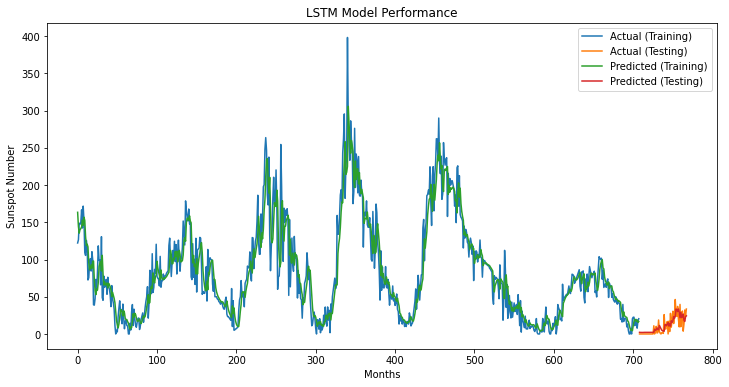

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create LSTM model
def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(12, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the LSTM model
def train_evaluate_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    model = create_lstm_model(units)
    train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(model, train_data, test_data)
    results.append((units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions))

# Print the results and plot the predictions
for units, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions in results:
    print(f"LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print()

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
    plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
    plt.title('LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()


Linear Regression Model:
Train RMSE: 28.12
Test RMSE: 12.96



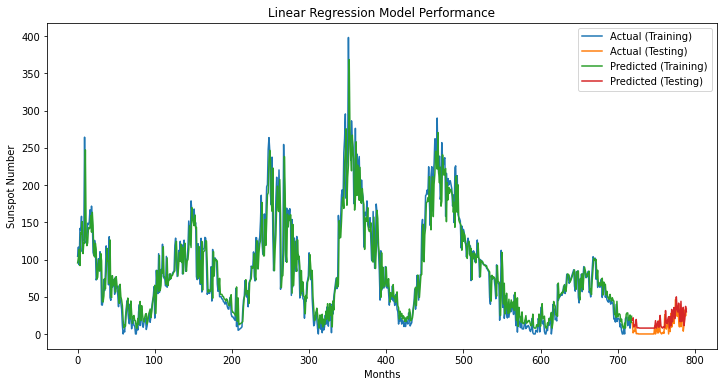

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("Linear Regression Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


Linear Regression Model:
Train RMSE: 28.12
Test RMSE: 12.96
Train MAE: 19.11
Test MAE: 10.76
Train SMAPE: 33.54
Test SMAPE: 122.45
Train R2: 0.82
Test R2: -0.14



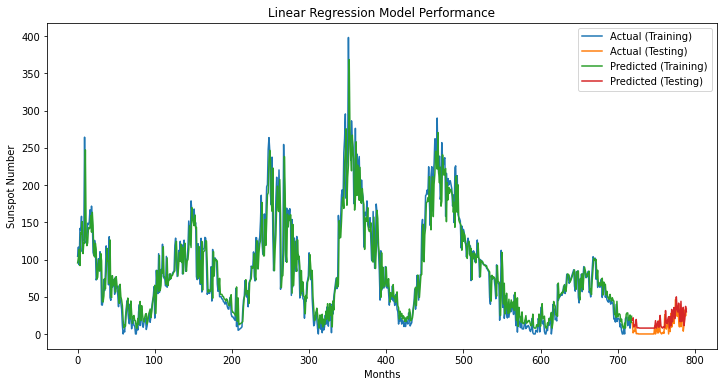

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Linear Regression Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


AdaBoost Model:
Train RMSE: 26.18
Test RMSE: 14.51



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


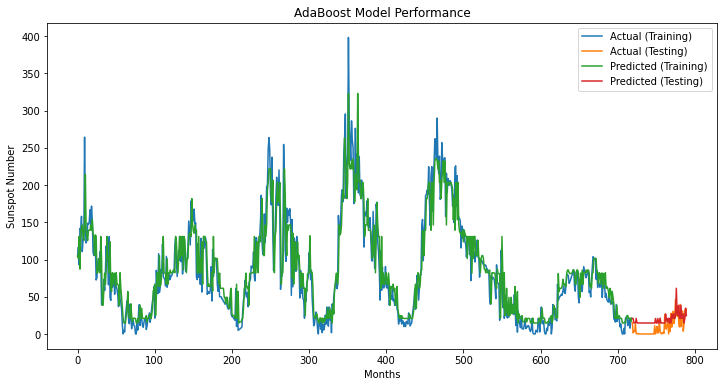

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the AdaBoost model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("AdaBoost Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('AdaBoost Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost Model:
Train RMSE: 26.18
Test RMSE: 14.51
Train MAE: 19.19
Test MAE: 13.16
Train SMAPE: 33.73
Test SMAPE: 122.97
Train R2: 0.84
Test R2: -0.43



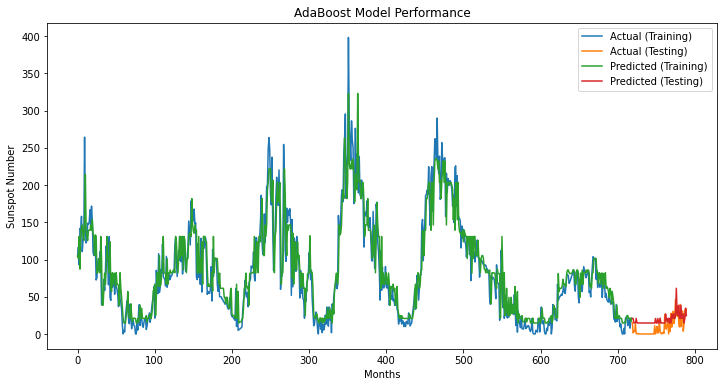

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the AdaBoost model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("AdaBoost Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('AdaBoost Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR Model:
Train RMSE: 28.84
Test RMSE: 30.08
Train MAE: 21.43
Test MAE: 27.31
Train SMAPE: 38.01
Test SMAPE: 134.29
Train R2: 0.81
Test R2: -5.16



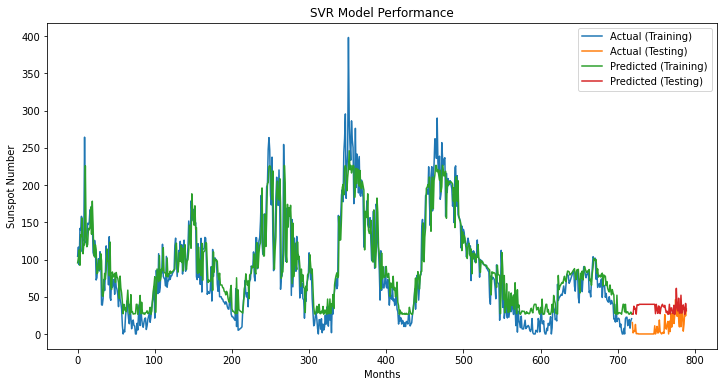

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the SVR model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the SVR model
    model = SVR(kernel='rbf', C=100, epsilon=0.1)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the SVR model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("SVR Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('SVR Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/3518248179.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57



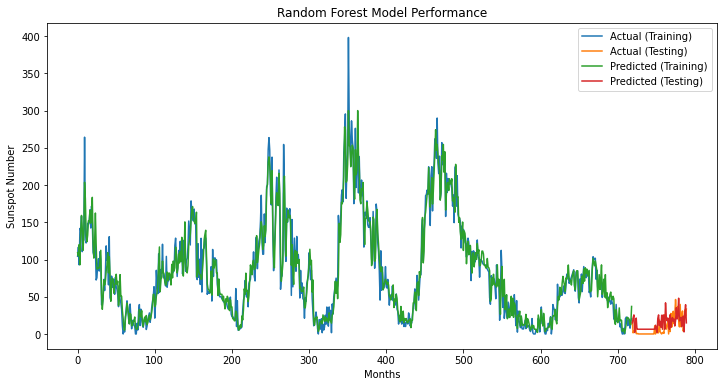

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/446908784.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 23.70
Test SMAPE: 129.44
Train R2: 0.94
Test R2: -0.26



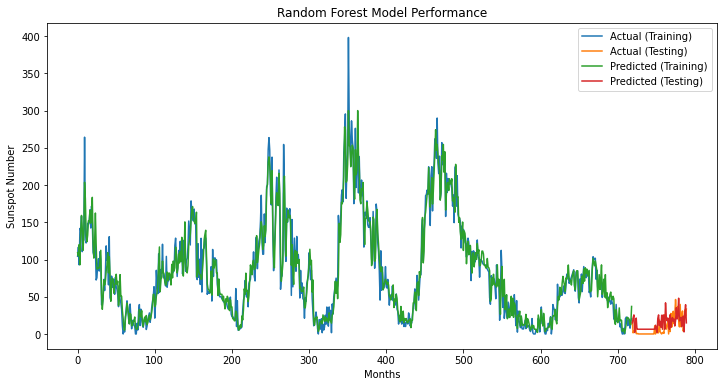

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/1120370742.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 23.70
Test SMAPE: 129.44
Train R2: 0.94
Test R2: -0.26



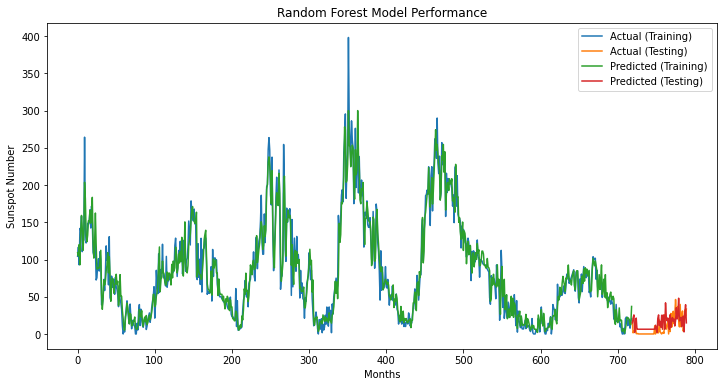

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64
Test RMSE: 12.74
Train MAE: 15.92
Test MAE: 11.20
Train R2: 0.88
Test R2: -0.11



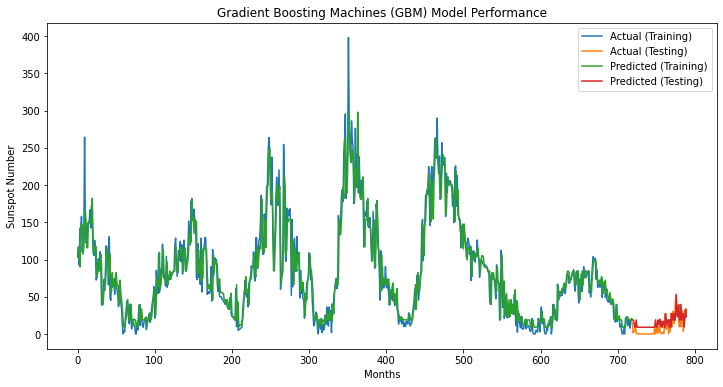

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64
Test RMSE: 12.74
Train MAE: 15.92
Test MAE: 11.20
Train SMAPE: 15.11
Test SMAPE: 61.81
Train R2: 0.88
Test R2: -0.11



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: x and y must have same first dimension, but have shapes (707,) and (719, 1)

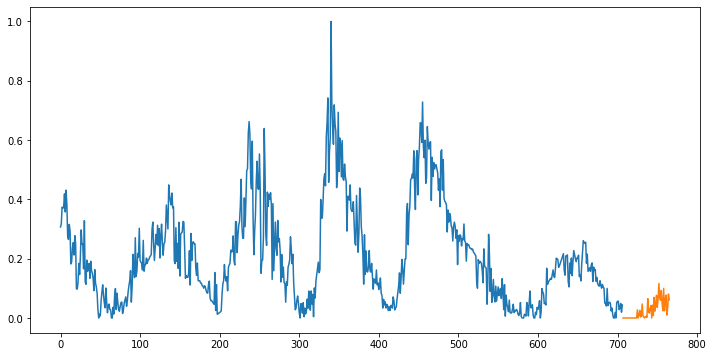

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2 = train_evaluate_model(train_data, test_data)

# Print the results and plot the predictions
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, ConvLSTM2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps-1):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12  # Number of time steps to consider for each sample

X_train, y_train = prepare_data(train_data, n_steps)
X_test, y_test = prepare_data(test_data, n_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the models
models = {
    'GBM': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'RF': RandomForestRegressor(n_estimators=100, random_state=42),
    'LR': LinearRegression(),
    'SVR': SVR(),
    'LSTM': Sequential([
        LSTM(64, activation='relu', input_shape=(n_steps, 1)),
        Dense(1)
    ]),
    'Adaboost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'ConLSTM': Sequential([
        ConvLSTM2D(64, kernel_size=(1, 3), activation='relu', input_shape=(1, n_steps, 1)),
        Dense(1)
    ])
}

# Train and evaluate all model combinations
results = {}
for i in range(1, len(models) + 1):
    for combo in itertools.combinations(models.keys(), i):
        model_names = list(combo)
        model_key = '+'.join(model_names)
        model_list = [models[name] for name in model_names]

        # Train the ensemble model
        ensemble_model = VotingRegressor(estimators=list(zip(model_names, model_list)))
        ensemble_model.fit(X_train, y_train)

        # Make predictions
        train_predictions = ensemble_model.predict(X_train)
        test_predictions = ensemble_model.predict(X_test)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

        # Calculate MAE
        train_mae = mean_absolute_error(y_train, train_predictions)
        test_mae = mean_absolute_error(y_test, test_predictions)

        # Calculate R2 score
        train_r2 = r2_score(y_train, train_predictions)
        test_r2 = r2_score(y_test, test_predictions)

        # Store the results
        results[model_key] = {
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train MAE': train_mae,
            'Test MAE': test_mae,
            'Train R2': train_r2,
            'Test R2': test_r2
        }

# Print the results
for model_key, metrics in results.items():
    print(model_key + " Model:")
    print(f"Train RMSE: {metrics['Train RMSE']:.2f}")
    print(f"Test RMSE: {metrics['Test RMSE']:.2f}")
    print(f"Train MAE: {metrics['Train MAE']:.2f}")
    print(f"Test MAE: {metrics['Test MAE']:.2f}")
    print(f"Train R2: {metrics['Train R2']:.2f}")
    print(f"Test R2: {metrics['Test R2']:.2f}")
    print()

# Plot the predictions for the best performing model
best_model_key = max(results, key=lambda x: results[x]['Test R2'])
best_model = VotingRegressor(estimators=list(zip(best_model_key.split('+'), [models[name] for name in best_model_key.split('+')])))

best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)
best_predictions = scaler.inverse_transform(best_predictions.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), best_predictions, label='Predicted')
plt.title('Best Performing Model: ' + best_model_key)
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


ValueError: Input 0 of layer "conv_lstm2d" is incompatible with the layer: expected ndim=5, found ndim=4. Full shape received: (None, 1, 12, 1)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import itertools

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps-1):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12  # Number of time steps to consider for each sample

X_train, y_train = prepare_data(train_data, n_steps)
X_test, y_test = prepare_data(test_data, n_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the models
models = {
    'GBM': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'RF': RandomForestRegressor(n_estimators=100, random_state=42),
    'LR': LinearRegression(),
    'SVR': SVR(),
    'LSTM': Sequential([
        LSTM(64, activation='relu', input_shape=(n_steps, 1)),
        Dense(1)
    ]),
    'Adaboost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Evaluate all possible combinations of models
results = {}
for r in range(1, len(models) + 1):
    for combo in itertools.combinations(models.keys(), r):
        model_names = list(combo)

        # Create the ensemble model
        model_key = '+'.join(model_names)
        model_list = [models[name] for name in model_names]

        # Train the ensemble model
        ensemble_model = VotingRegressor(estimators=list(zip(model_names, model_list)))
        ensemble_model.fit(X_train, y_train)

        # Make predictions
        train_predictions = ensemble_model.predict(X_train)
        test_predictions = ensemble_model.predict(X_test)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
        test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

        # Calculate MAE
        train_mae = mean_absolute_error(y_train, train_predictions)
        test_mae = mean_absolute_error(y_test, test_predictions)

        # Calculate R2 score
        train_r2 = r2_score(y_train, train_predictions)
        test_r2 = r2_score(y_test, test_predictions)

        # Store the results
        results[model_key] = {
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train MAE': train_mae,
            'Test MAE': test_mae,
            'Train R2': train_r2,
            'Test R2': test_r2
        }

# Print the results
for model_key, metrics in results.items():
    print(model_key + " Model:")
    print(f"Train RMSE: {metrics['Train RMSE']:.2f}")
    print(f"Test RMSE: {metrics['Test RMSE']:.2f}")
    print(f"Train MAE: {metrics['Train MAE']:.2f}")
    print(f"Test MAE: {metrics['Test MAE']:.2f}")
    print(f"Train R2: {metrics['Train R2']:.2f}")
    print(f"Test R2: {metrics['Test R2']:.2f}")
    print()

# Plot the predictions for the best performing model
best_model_key = max(results, key=lambda x: results[x]['Test R2'])
best_model = VotingRegressor(estimators=list(zip(best_model_key.split('+'), [models[name] for name in best_model_key.split('+')])))

best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)
best_predictions = scaler.inverse_transform(best_predictions.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), best_predictions, label='Predicted')
plt.title('Best Performing Model: ' + best_model_key)
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


ValueError: Found array with dim 3. Estimator expected <= 2.

Epoch 1/50
23/23 [==============================] - 2s 7ms/step - loss: 0.0250
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 3/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0069
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0062
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 8/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 9/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 10/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 11/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 12/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 13/50
23/23 [=========================

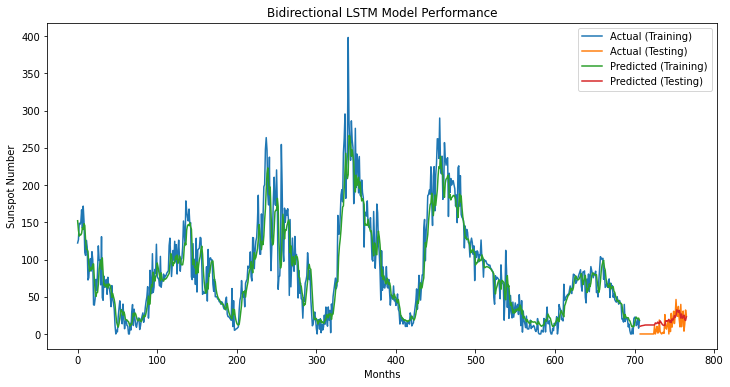

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps-1):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12  # Number of time steps to consider for each sample

X_train, y_train = prepare_data(train_data, n_steps)
X_test, y_test = prepare_data(test_data, n_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert the scaling
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# Calculate MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print("Bidirectional LSTM Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Bidirectional LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/1120370742.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 23.70
Test SMAPE: 129.44
Train R2: 0.94
Test R2: -0.26



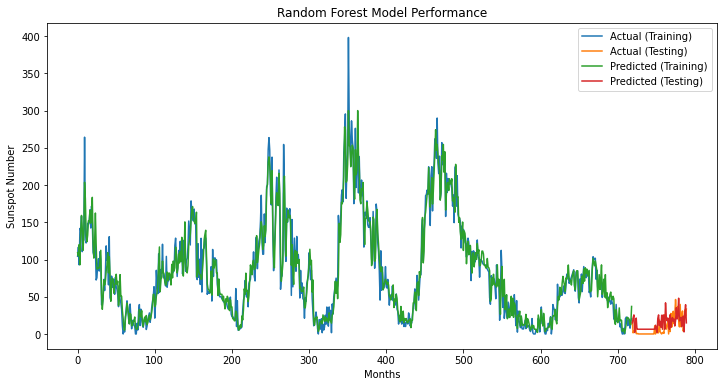

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/12496901.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 23.69960
Test SMAPE: 129.43665
Train R2: 0.93815
Test R2: -0.25526
Computation Time: 0.13959 seconds

CPU Usage: 38.80000 MHz
Memory Used: 21873.88672 MB



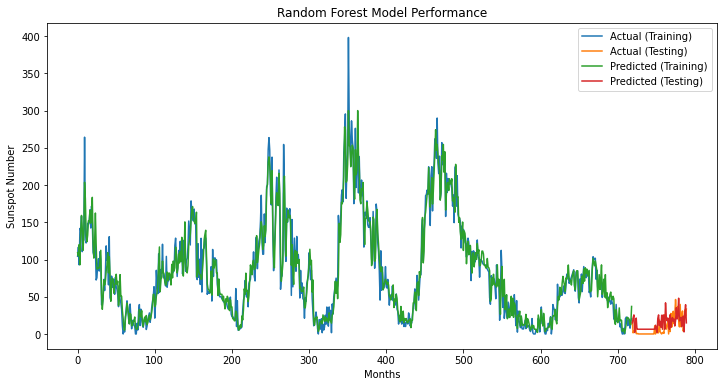

In [115]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    start_time = time.time()
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# train_size = 720  # Number of months for training


# test_size = 72  # Number of months for testing

2/2 [==============================] - 0s 8ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/1724044015.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Bidirectional LSTM Model with 19 hidden units:
Train RMSE: 25.40
Test RMSE: 9.81



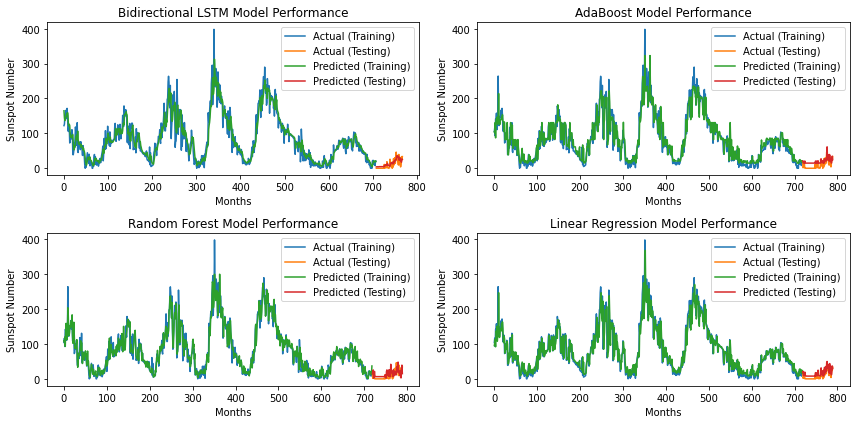

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    # Bidirectional LSTM
    lstm_model = create_bidirectional_lstm_model(units)
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # AdaBoost
    adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)

    # Random Forest
    rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions = train_evaluate_rf_model(train_data, test_data)

    # Linear Regression
    lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions = train_evaluate_lr_model(train_data, test_data)

    results.append((
        units,
        lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions,
        adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions,
        rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions,
        lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions
    ))

# Print the results and plot the predictions
for units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions, rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions, lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {lstm_train_rmse:.2f}")
    print(f"Test RMSE: {lstm_test_rmse:.2f}")
    print()

    # Plot the predictions for each model
    plt.figure(figsize=(12, 6))

    # Bidirectional LSTM
    plt.subplot(221)
    plt.plot(range(len(lstm_y_train)), lstm_y_train, label='Actual (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_y_test, label='Actual (Testing)')
    plt.plot(range(len(lstm_y_train)), lstm_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # AdaBoost
    plt.subplot(222)
    plt.plot(range(len(adaboost_y_train)), adaboost_y_train, label='Actual (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_y_test, label='Actual (Testing)')
    plt.plot(range(len(adaboost_y_train)), adaboost_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_test_predictions, label='Predicted (Testing)')
    plt.title('AdaBoost Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Random Forest
    plt.subplot(223)
    plt.plot(range(len(rf_y_train)), rf_y_train, label='Actual (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_y_test, label='Actual (Testing)')
    plt.plot(range(len(rf_y_train)), rf_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
    plt.title('Random Forest Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Linear Regression
    plt.subplot(224)
    plt.plot(range(len(lr_y_train)), lr_y_train, label='Actual (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_y_test, label='Actual (Testing)')
    plt.plot(range(len(lr_y_train)), lr_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_test_predictions, label='Predicted (Testing)')
    plt.title('Linear Regression Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


2/2 [==============================] - 0s 6ms/step
AdaBoost Model:
Train RMSE: 26.182112267365596
Test RMSE: 14.505973447783376
Computation Time: 0.03672337532043457

Bidirectional LSTM Model:
Train RMSE: 25.177432749426753
Test RMSE: 9.80223961719613
Computation Time: 25.04454493522644


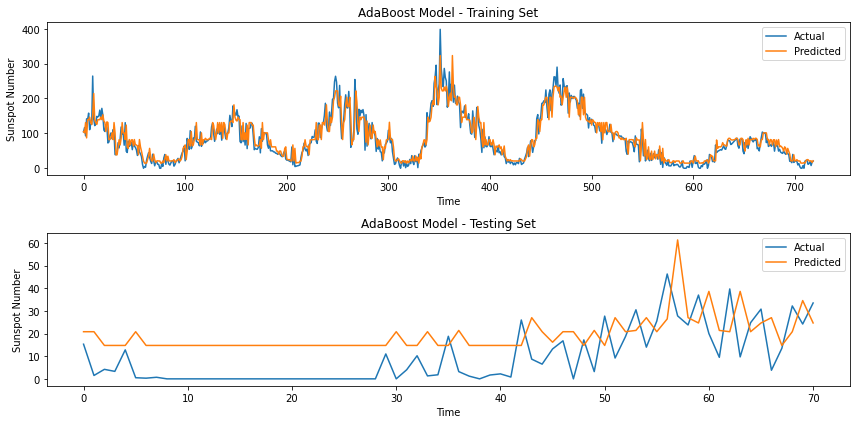

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    start_time = time.time()
    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    computation_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, computation_time, y_train, train_predictions, y_test, test_predictions

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []

    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    return np.array(X), np.array(y)

# Train and evaluate the models
lstm_model = create_bidirectional_lstm_model(64)
adaboost_train_rmse, adaboost_test_rmse, adaboost_computation_time, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)
lstm_train_rmse, lstm_test_rmse, lstm_computation_time, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

# Print the results
print('AdaBoost Model:')
print('Train RMSE:', adaboost_train_rmse)
print('Test RMSE:', adaboost_test_rmse)
print('Computation Time:', adaboost_computation_time)

print('\nBidirectional LSTM Model:')
print('Train RMSE:', lstm_train_rmse)
print('Test RMSE:', lstm_test_rmse)
print('Computation Time:', lstm_computation_time)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(adaboost_y_train, label='Actual')
plt.plot(adaboost_train_predictions, label='Predicted')
plt.title('AdaBoost Model - Training Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(adaboost_y_test, label='Actual')
plt.plot(adaboost_test_predictions, label='Predicted')
plt.title('AdaBoost Model - Testing Set')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 4ms/step
LSTM Results (Hidden Units: 19):
Train RMSE: 25.72
Test RMSE: 9.63

Bidirectional LSTM Results (Hidden Units: 19):
Train RMSE: 25.63
Test RMSE: 10.40



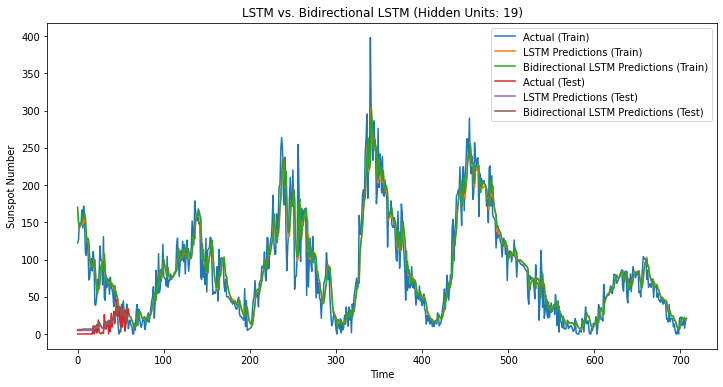

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data)-sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Create LSTM model
def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(12, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_bidirectional_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    # Create and compile the LSTM model
    lstm_model = create_lstm_model(units)

    # Create and compile the Bidirectional LSTM model
    bidirectional_lstm_model = create_bidirectional_lstm_model(units)

    # LSTM
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # Bidirectional LSTM
    bidirectional_lstm_train_rmse, bidirectional_lstm_test_rmse, bidirectional_lstm_y_train, bidirectional_lstm_train_predictions, bidirectional_lstm_y_test, bidirectional_lstm_test_predictions = train_evaluate_bidirectional_lstm_model(bidirectional_lstm_model, train_data, test_data)

    results.append((
        units,
        lstm_train_rmse,
        lstm_test_rmse,
        lstm_y_train,
        lstm_train_predictions,
        lstm_y_test,
        lstm_test_predictions,
        bidirectional_lstm_train_rmse,
        bidirectional_lstm_test_rmse,
        bidirectional_lstm_y_train,
        bidirectional_lstm_train_predictions,
        bidirectional_lstm_y_test,
        bidirectional_lstm_test_predictions
    ))

# Print the results
for result in results:
    units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, bidirectional_lstm_train_rmse, bidirectional_lstm_test_rmse, bidirectional_lstm_y_train, bidirectional_lstm_train_predictions, bidirectional_lstm_y_test, bidirectional_lstm_test_predictions = result

    print("LSTM Results (Hidden Units: {}):".format(units))
    print("Train RMSE: {:.2f}".format(lstm_train_rmse))
    print("Test RMSE: {:.2f}".format(lstm_test_rmse))
    print()

    print("Bidirectional LSTM Results (Hidden Units: {}):".format(units))
    print("Train RMSE: {:.2f}".format(bidirectional_lstm_train_rmse))
    print("Test RMSE: {:.2f}".format(bidirectional_lstm_test_rmse))
    print()

    # Plot the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(lstm_y_train, label='Actual (Train)')
    plt.plot(lstm_train_predictions, label='LSTM Predictions (Train)')
    plt.plot(bidirectional_lstm_train_predictions, label='Bidirectional LSTM Predictions (Train)')
    plt.plot(lstm_y_test, label='Actual (Test)')
    plt.plot(lstm_test_predictions, label='LSTM Predictions (Test)')
    plt.plot(bidirectional_lstm_test_predictions, label='Bidirectional LSTM Predictions (Test)')
    plt.title("LSTM vs. Bidirectional LSTM (Hidden Units: {})".format(units))
    plt.xlabel("Time")
    plt.ylabel("Sunspot Number")
    plt.legend()
    plt.show()


In [48]:
print("________________train_size = 720  # Number of months for training________")
print("__________________test_size = 72  # Number of months for testing_________")
print("__________________hyperparameters__hidden_units = [19]_______\n")

print("=========LSTM:=========\n","Train:", lstm_train_rmse,"====","Test:",lstm_test_rmse)
print("=========adaboost:=========\n","Train:", adaboost_train_rmse,"====","Test:",adaboost_test_rmse)
print("=========RF:=========\n","Train:", rf_train_rmse,"====","Test:",rf_test_rmse)
print("=========LR:=========\n","Train:", lr_train_rmse,"====","Test:",lr_test_rmse)

________________train_size = 720  # Number of months for training________
__________________test_size = 72  # Number of months for testing_________
__________________hyperparameters__hidden_units = [19]_______

=========LSTM:=========
 Train: 25.401533747101773 ==== Test: 9.813533610238611
=========adaboost:=========
 Train: 26.182112267365596 ==== Test: 14.505973447783376
=========RF:=========
 Train: 16.43483686582303 ==== Test: 13.574601298161213
=========LR:=========
 Train: 28.121671000630048 ==== Test: 12.961963746660238


3/3 [==============================] - 0s 3ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/2949351355.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Bidirectional LSTM Model with 19 hidden units:
Train RMSE: 24.78
Test RMSE: 14.82



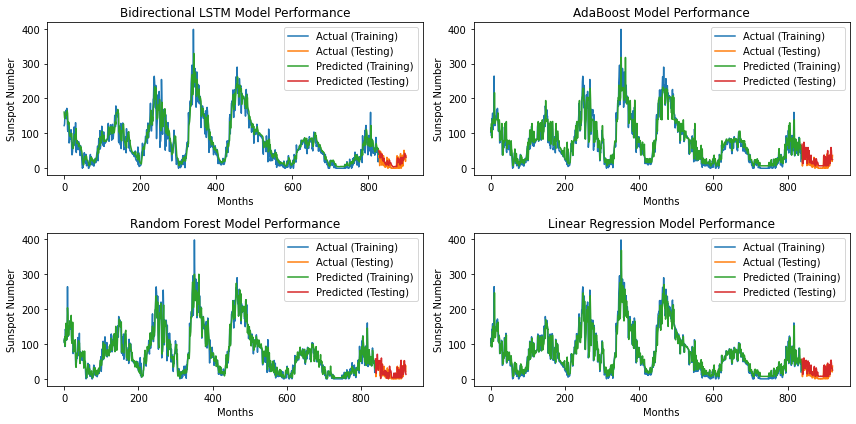

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 840  # Number of months for training
test_size = 84  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    # Bidirectional LSTM
    lstm_model = create_bidirectional_lstm_model(units)
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # AdaBoost
    adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)

    # Random Forest
    rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions = train_evaluate_rf_model(train_data, test_data)

    # Linear Regression
    lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions = train_evaluate_lr_model(train_data, test_data)

    results.append((
        units,
        lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions,
        adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions,
        rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions,
        lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions
    ))

# Print the results and plot the predictions
for units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions, rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions, lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {lstm_train_rmse:.2f}")
    print(f"Test RMSE: {lstm_test_rmse:.2f}")
    print()

    # Plot the predictions for each model
    plt.figure(figsize=(12, 6))

    # Bidirectional LSTM
    plt.subplot(221)
    plt.plot(range(len(lstm_y_train)), lstm_y_train, label='Actual (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_y_test, label='Actual (Testing)')
    plt.plot(range(len(lstm_y_train)), lstm_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # AdaBoost
    plt.subplot(222)
    plt.plot(range(len(adaboost_y_train)), adaboost_y_train, label='Actual (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_y_test, label='Actual (Testing)')
    plt.plot(range(len(adaboost_y_train)), adaboost_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_test_predictions, label='Predicted (Testing)')
    plt.title('AdaBoost Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Random Forest
    plt.subplot(223)
    plt.plot(range(len(rf_y_train)), rf_y_train, label='Actual (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_y_test, label='Actual (Testing)')
    plt.plot(range(len(rf_y_train)), rf_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
    plt.title('Random Forest Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Linear Regression
    plt.subplot(224)
    plt.plot(range(len(lr_y_train)), lr_y_train, label='Actual (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_y_test, label='Actual (Testing)')
    plt.plot(range(len(lr_y_train)), lr_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_test_predictions, label='Predicted (Testing)')
    plt.title('Linear Regression Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [52]:
print("________________train_size = 840  # Number of months for training________")
print("__________________test_size = 84  # Number of months for testing_________")
print("__________________hyperparameters__hidden_units = [19]_______\n")

print("=========LSTM:=========\n","Train:", lstm_train_rmse,"====","Test:",lstm_test_rmse)
print("=========adaboost:=========\n","Train:", adaboost_train_rmse,"====","Test:",adaboost_test_rmse)
print("=========RF:=========\n","Train:", rf_train_rmse,"====","Test:",rf_test_rmse)
print("=========LR:=========\n","Train:", lr_train_rmse,"====","Test:",lr_test_rmse)

________________train_size = 840  # Number of months for training________
__________________test_size = 84  # Number of months for testing_________
__________________hyperparameters__hidden_units = [19]_______

=========LSTM:=========
 Train: 24.78041551677496 ==== Test: 14.82033252624842
=========adaboost:=========
 Train: 25.850602586710128 ==== Test: 18.278583340378592
=========RF:=========
 Train: 15.86387352302662 ==== Test: 16.96682013251538
=========LR:=========
 Train: 27.359350985505213 ==== Test: 16.714463555531125


3/3 [==============================] - 0s 3ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/1465338698.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Bidirectional LSTM Model with 19 hidden units:
Train RMSE: 23.80
Test RMSE: 31.09



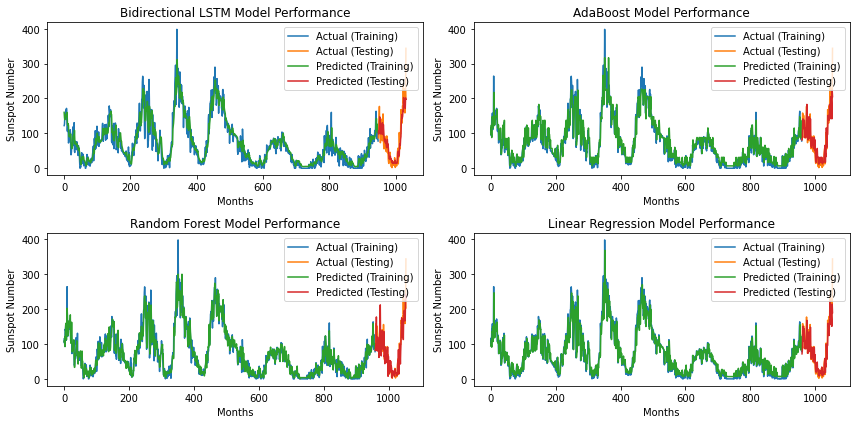

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 960  # Number of months for training
test_size = 96  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    # Bidirectional LSTM
    lstm_model = create_bidirectional_lstm_model(units)
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # AdaBoost
    adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)

    # Random Forest
    rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions = train_evaluate_rf_model(train_data, test_data)

    # Linear Regression
    lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions = train_evaluate_lr_model(train_data, test_data)

    results.append((
        units,
        lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions,
        adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions,
        rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions,
        lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions
    ))

# Print the results and plot the predictions
for units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions, rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions, lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {lstm_train_rmse:.2f}")
    print(f"Test RMSE: {lstm_test_rmse:.2f}")
    print()

    # Plot the predictions for each model
    plt.figure(figsize=(12, 6))

    # Bidirectional LSTM
    plt.subplot(221)
    plt.plot(range(len(lstm_y_train)), lstm_y_train, label='Actual (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_y_test, label='Actual (Testing)')
    plt.plot(range(len(lstm_y_train)), lstm_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # AdaBoost
    plt.subplot(222)
    plt.plot(range(len(adaboost_y_train)), adaboost_y_train, label='Actual (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_y_test, label='Actual (Testing)')
    plt.plot(range(len(adaboost_y_train)), adaboost_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_test_predictions, label='Predicted (Testing)')
    plt.title('AdaBoost Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Random Forest
    plt.subplot(223)
    plt.plot(range(len(rf_y_train)), rf_y_train, label='Actual (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_y_test, label='Actual (Testing)')
    plt.plot(range(len(rf_y_train)), rf_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
    plt.title('Random Forest Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Linear Regression
    plt.subplot(224)
    plt.plot(range(len(lr_y_train)), lr_y_train, label='Actual (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_y_test, label='Actual (Testing)')
    plt.plot(range(len(lr_y_train)), lr_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_test_predictions, label='Predicted (Testing)')
    plt.title('Linear Regression Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [54]:
print("________________train_size = 960  # Number of months for training________")
print("__________________test_size = 96  # Number of months for testing_________")
print("__________________hyperparameters__hidden_units = [19]_______\n")

print("=========LSTM:=========\n","Train:", lstm_train_rmse,"====","Test:",lstm_test_rmse)
print("=========adaboost:=========\n","Train:", adaboost_train_rmse,"====","Test:",adaboost_test_rmse)
print("=========RF:=========\n","Train:", rf_train_rmse,"====","Test:",rf_test_rmse)
print("=========LR:=========\n","Train:", lr_train_rmse,"====","Test:",lr_test_rmse)

________________train_size = 960  # Number of months for training________
__________________test_size = 96  # Number of months for testing_________
__________________hyperparameters__hidden_units = [19]_______

=========LSTM:=========
 Train: 23.796500359449805 ==== Test: 31.09389914773545
=========adaboost:=========
 Train: 24.995748817432055 ==== Test: 33.095852894359695
=========RF:=========
 Train: 15.578617926512283 ==== Test: 34.91422159489875
=========LR:=========
 Train: 26.548210700493396 ==== Test: 32.62917543196378


3/3 [==============================] - 0s 9ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/1331794198.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Bidirectional LSTM Model with 19 hidden units:
Train RMSE: 25.11
Test RMSE: 29.98



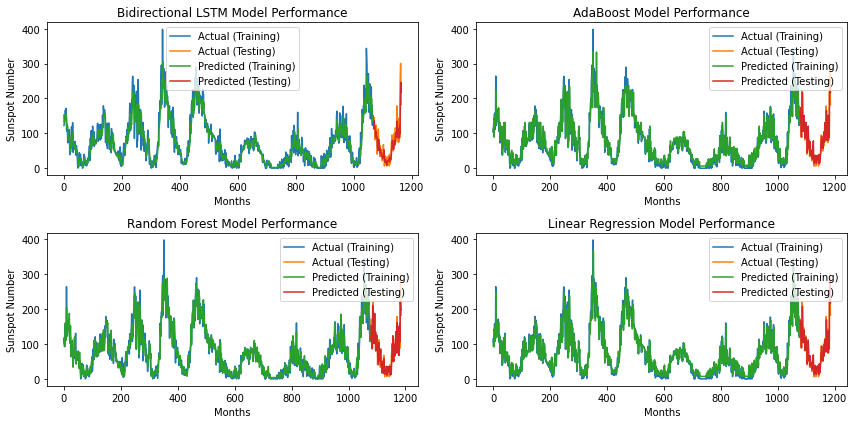

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 1080  # Number of months for training
test_size = 108  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    # Bidirectional LSTM
    lstm_model = create_bidirectional_lstm_model(units)
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # AdaBoost
    adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)

    # Random Forest
    rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions = train_evaluate_rf_model(train_data, test_data)

    # Linear Regression
    lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions = train_evaluate_lr_model(train_data, test_data)

    results.append((
        units,
        lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions,
        adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions,
        rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions,
        lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions
    ))

# Print the results and plot the predictions
for units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions, rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions, lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {lstm_train_rmse:.2f}")
    print(f"Test RMSE: {lstm_test_rmse:.2f}")
    print()

    # Plot the predictions for each model
    plt.figure(figsize=(12, 6))

    # Bidirectional LSTM
    plt.subplot(221)
    plt.plot(range(len(lstm_y_train)), lstm_y_train, label='Actual (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_y_test, label='Actual (Testing)')
    plt.plot(range(len(lstm_y_train)), lstm_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # AdaBoost
    plt.subplot(222)
    plt.plot(range(len(adaboost_y_train)), adaboost_y_train, label='Actual (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_y_test, label='Actual (Testing)')
    plt.plot(range(len(adaboost_y_train)), adaboost_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_test_predictions, label='Predicted (Testing)')
    plt.title('AdaBoost Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Random Forest
    plt.subplot(223)
    plt.plot(range(len(rf_y_train)), rf_y_train, label='Actual (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_y_test, label='Actual (Testing)')
    plt.plot(range(len(rf_y_train)), rf_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
    plt.title('Random Forest Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Linear Regression
    plt.subplot(224)
    plt.plot(range(len(lr_y_train)), lr_y_train, label='Actual (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_y_test, label='Actual (Testing)')
    plt.plot(range(len(lr_y_train)), lr_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_test_predictions, label='Predicted (Testing)')
    plt.title('Linear Regression Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [56]:
print("________________train_size = 1080  # Number of months for training________")
print("__________________test_size = 108  # Number of months for testing_________")
print("__________________hyperparameters__hidden_units = [19]_______\n")

print("=========LSTM:=========\n","Train:", lstm_train_rmse,"====","Test:",lstm_test_rmse)
print("=========adaboost:=========\n","Train:", adaboost_train_rmse,"====","Test:",adaboost_test_rmse)
print("=========RF:=========\n","Train:", rf_train_rmse,"====","Test:",rf_test_rmse)
print("=========LR:=========\n","Train:", lr_train_rmse,"====","Test:",lr_test_rmse)

________________train_size = 1080  # Number of months for training________
__________________test_size = 108  # Number of months for testing_________
__________________hyperparameters__hidden_units = [19]_______

=========LSTM:=========
 Train: 25.107225101635635 ==== Test: 29.975516091938474
=========adaboost:=========
 Train: 25.99727764914192 ==== Test: 32.38499291005928
=========RF:=========
 Train: 15.972311750700928 ==== Test: 32.958325052570096
=========LR:=========
 Train: 27.64067278383588 ==== Test: 31.22581142599845


3/3 [==============================] - 0s 8ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/2894561013.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Bidirectional LSTM Model with 19 hidden units:
Train RMSE: 25.10
Test RMSE: 29.52



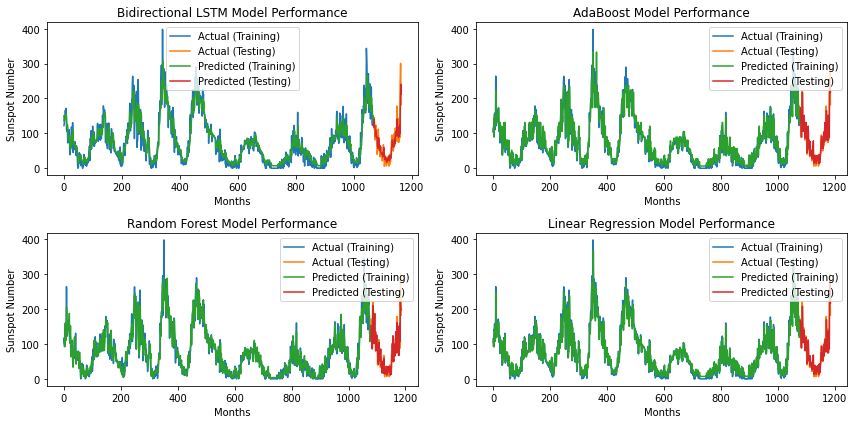

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 1080  # Number of months for training
test_size = 108  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 1188

results = []

# Perform the comparative study
for units in hidden_units:
    # Bidirectional LSTM
    lstm_model = create_bidirectional_lstm_model(units)
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # AdaBoost
    adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)

    # Random Forest
    rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions = train_evaluate_rf_model(train_data, test_data)

    # Linear Regression
    lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions = train_evaluate_lr_model(train_data, test_data)

    results.append((
        units,
        lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions,
        adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions,
        rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions,
        lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions
    ))

# Print the results and plot the predictions
for units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions, rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions, lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {lstm_train_rmse:.2f}")
    print(f"Test RMSE: {lstm_test_rmse:.2f}")
    print()

    # Plot the predictions for each model
    plt.figure(figsize=(12, 6))

    # Bidirectional LSTM
    plt.subplot(221)
    plt.plot(range(len(lstm_y_train)), lstm_y_train, label='Actual (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_y_test, label='Actual (Testing)')
    plt.plot(range(len(lstm_y_train)), lstm_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # AdaBoost
    plt.subplot(222)
    plt.plot(range(len(adaboost_y_train)), adaboost_y_train, label='Actual (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_y_test, label='Actual (Testing)')
    plt.plot(range(len(adaboost_y_train)), adaboost_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_test_predictions, label='Predicted (Testing)')
    plt.title('AdaBoost Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Random Forest
    plt.subplot(223)
    plt.plot(range(len(rf_y_train)), rf_y_train, label='Actual (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_y_test, label='Actual (Testing)')
    plt.plot(range(len(rf_y_train)), rf_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
    plt.title('Random Forest Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Linear Regression
    plt.subplot(224)
    plt.plot(range(len(lr_y_train)), lr_y_train, label='Actual (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_y_test, label='Actual (Testing)')
    plt.plot(range(len(lr_y_train)), lr_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_test_predictions, label='Predicted (Testing)')
    plt.title('Linear Regression Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create LSTM model
def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(12, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the LSTM model
def train_evaluate_lstm(train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model = create_lstm_model(19)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    base_estimator = DecisionTreeRegressor(max_depth=4)
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train.ravel())

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate each model individually
models = [('LSTM', train_evaluate_lstm), ('AdaBoost', train_evaluate_adaboost)]

results = []
for name, train_evaluate_model in models:
    train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
    results.append((name, train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions))

# Perform ensemble averaging for 2 models, 3 models, up to all models
ensemble_results = []
for k in range(2, len(models) + 1):
    for i in range(len(models) - k + 1):
        ensemble_name = ', '.join([name for name, _ in models[i:i+k]])
        ensemble_train_predictions = np.mean([np.pad(train_predictions, ((0, len(results[i+k-1][4])-len(train_predictions)), (0, 0)), 'constant') for _, _, _, train_predictions, _, _, _ in results[i:i+k]], axis=0)
        ensemble_test_predictions = np.mean([np.pad(test_predictions, ((0, len(results[i+k-1][6])-len(test_predictions)), (0, 0)), 'constant') for _, _, _, _, _, _, test_predictions in results[i:i+k]], axis=0)
        ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, ensemble_train_predictions))
        ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, ensemble_test_predictions))
        ensemble_results.append((ensemble_name, ensemble_train_rmse, ensemble_test_rmse, y_train, ensemble_train_predictions, y_test, ensemble_test_predictions))

# Print the results
for name, train_rmse, test_rmse, _, _, _, _ in results:
    print(f'{name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')

print()

for ensemble_name, ensemble_train_rmse, ensemble_test_rmse, _, _, _, _ in ensemble_results:
    print(f'{ensemble_name} - Train RMSE: {ensemble_train_rmse:.2f}, Test RMSE: {ensemble_test_rmse:.2f}')


2/2 [==============================] - 0s 6ms/step
LSTM - Train RMSE: 25.67, Test RMSE: 10.38
AdaBoost - Train RMSE: 26.18, Test RMSE: 14.51

LSTM, AdaBoost - Train RMSE: 24.45, Test RMSE: 12.96


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 1080  # Number of months for training
test_size = 108  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model = create_bidirectional_lstm_model(units)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse

# Train and evaluate each model individually
models = [
    ('LSTM', train_evaluate_lstm_model),
    ('AdaBoost', train_evaluate_adaboost_model),
    ('Random Forest', train_evaluate_rf_model),
    ('Linear Regression', train_evaluate_lr_model)
]

hidden_units = [50, 100, 150]

results = []

# Perform the comparative study
for units in hidden_units:
    row = [units]
    for name, train_evaluate_model in models:
        start_time = time.time()  # Start time
        start_cpu_usage = psutil.cpu_percent()  # Start CPU usage
        start_memory_usage = psutil.virtual_memory().used  # Start memory usage

        train_rmse, test_rmse = train_evaluate_model(train_data, test_data)

        end_time = time.time()  # End time
        end_cpu_usage = psutil.cpu_percent()  # End CPU usage
        end_memory_usage = psutil.virtual_memory().used  # End memory usage

        computation_time = end_time - start_time
        cpu_usage = end_cpu_usage - start_cpu_usage
        memory_usage = end_memory_usage - start_memory_usage

        row.extend([train_rmse, test_rmse, computation_time, cpu_usage, memory_usage])
    results.append(row)

# Display the results in a table
columns = ['Hidden Units', 'Train RMSE', 'Test RMSE', 'Computation Time', 'CPU Usage', 'Memory Usage']
df_results = pd.DataFrame(results, columns=columns)
print(df_results)


3/3 [==============================] - 0s 8ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/2008995889.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


3/3 [==============================] - 0s 9ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/2008995889.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


3/3 [==============================] - 0s 8ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_23888/2008995889.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ValueError: 6 columns passed, passed data had 21 columns

C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64
Test RMSE: 12.74
Train MAE: 15.92
Test MAE: 11.20
Train SMAPE: 15.11
Test SMAPE: 61.81
Train R2: 0.88
Test R2: -0.11



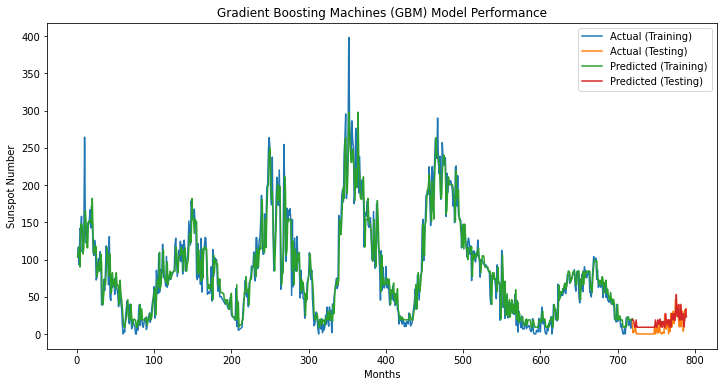

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Computation Time: 0.04713 seconds

CPU Usage: 37.90000 MHz
Memory Used: 21681.29297 MB



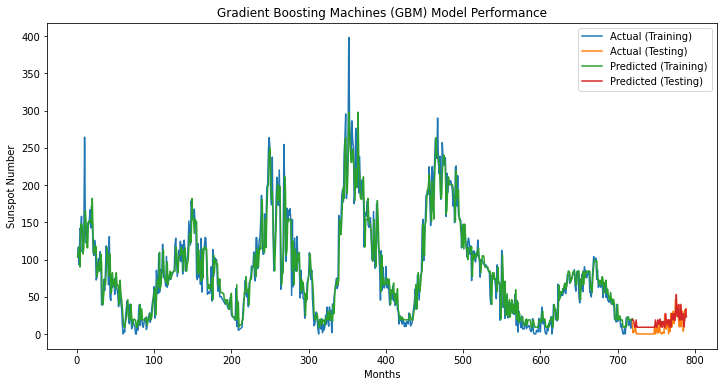

In [112]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    start_time = time.time()
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


3/3 [==============================] - 0s 2ms/step
GRU Model:
Train RMSE: 27.92
Test RMSE: 12.22
Train MAE: 19.11
Test MAE: 8.98
Train SMAPE: 17.09
Test SMAPE: 61.53
Train R2: 0.82
Test R2: -0.02



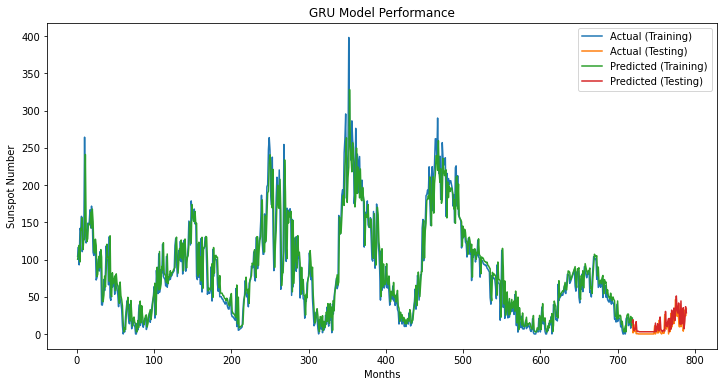

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GRU model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for GRU
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(1, 1), return_sequences=True))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the GRU model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GRU model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("GRU Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('GRU Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


3/3 [==============================] - 0s 4ms/step
GRU Model:
Train RMSE: 27.89026
Test RMSE: 11.96656
Train MAE: 18.93895
Test MAE: 8.42983
Train SMAPE: 17.29726
Test SMAPE: 62.23525
Train R2: 0.82188
Test R2: 0.02452
Computation Time: 15.41886 seconds
CPU Usage: 25.60 MHz
Memory Used: 21911.05 MB


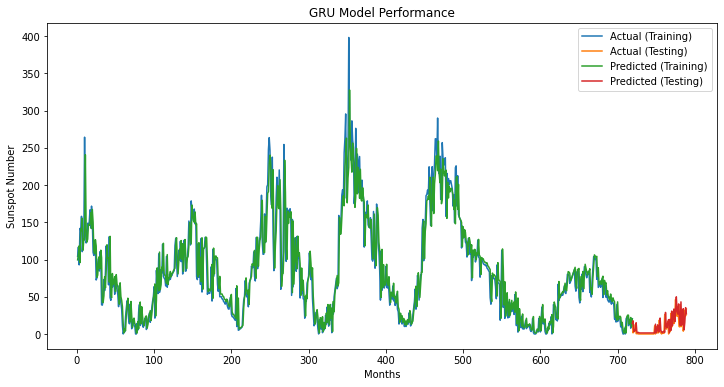

In [109]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GRU model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for GRU
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(1, 1), return_sequences=True))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the GRU model
    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GRU model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("GRU Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.2f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('GRU Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


3/3 [==============================] - 0s 3ms/step
Stacked LSTM Model:
Train RMSE: 27.90
Test RMSE: 11.77
Train MAE: 18.83
Test MAE: 8.19
Train SMAPE: 17.38
Test SMAPE: 62.80
Train R2: 0.82
Test R2: 0.06



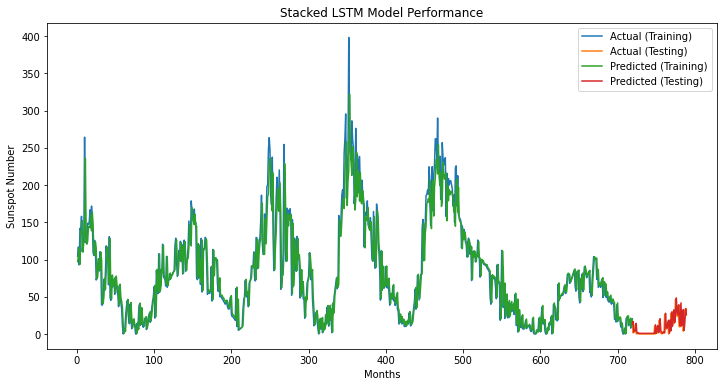

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Stacked LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Stacked LSTM Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


ETS Model:
Train RMSE: 25.84
Test RMSE: 14.26
Train MAE: 18.01
Test MAE: 11.59
Train SMAPE: 16.93
Test SMAPE: 66.68
Train R2: 0.85
Test R2: -0.40



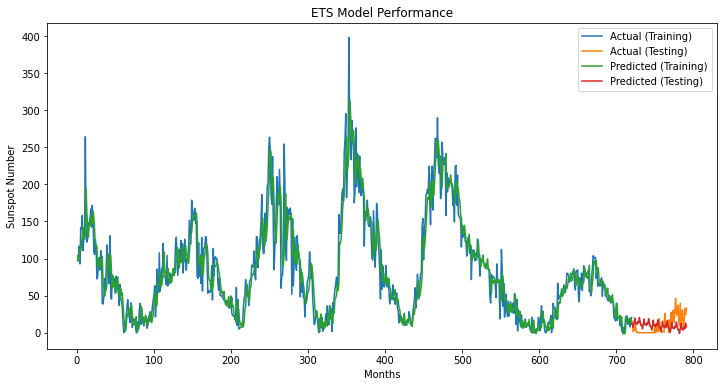

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number']

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the ETS model
def train_evaluate_model(train_data, test_data):
    # Fit the ETS model
    model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    # Make predictions
    train_predictions = model_fit.predict(start=0, end=len(train_data) - 1)
    test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the ETS model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("ETS Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('ETS Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


ARIMA Model:
Train RMSE: 26.20
Test RMSE: 17.01
Train MAE: 17.86
Test MAE: 15.38
Train SMAPE: 16.39
Test SMAPE: 60.96
Train R2: 0.84
Test R2: -1.00



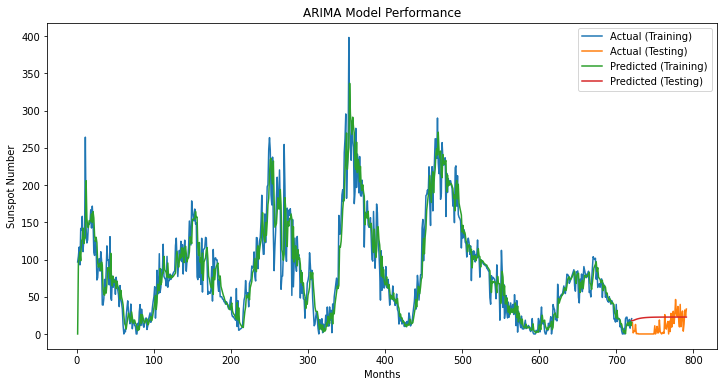

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number']

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the ARIMA model
def train_evaluate_model(train_data, test_data):
    # Fit the ARIMA model
    model = ARIMA(train_data, order=(2, 1, 2))
    model_fit = model.fit()

    # Make predictions
    train_predictions = model_fit.predict(start=0, end=len(train_data) - 1, typ='levels')
    test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the ARIMA model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("ARIMA Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('ARIMA Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()
